In [23]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from pathlib import Path
import os
import json
import sys, json
from IPython.display import display, HTML

pd.options.display.max_columns = None
pd.options.display.max_rows = None





In [2]:


def show_graphs(top_level_dir, timesteps = True):
    """
    Shows all the results in a directory from 
    """
    #This should point to wherever the results file is
    files = []

    for path in Path(top_level_dir).rglob('result.json'):
        
        files.append(path.__str__())

    #print(files)

    all_dfs = {}
    for file in files:

        #Extract the filename
        filename = file.split("/")[1]
        
        #print(filename)
        data = [json.loads(line) for line in open(file, 'r')]

        data_dict = {   'episode_len_mean':[], 
                        'timesteps_total':[], 
                        'episode_reward_mean':[],
                        'timesteps_this_iter':[],
                    }

        for i in data:
            data_dict['episode_len_mean'].append(i["episode_len_mean"])
            data_dict['timesteps_total'].append(i['timesteps_total'])
            data_dict['episode_reward_mean'].append(i['episode_reward_mean'])
            data_dict['timesteps_this_iter'].append(i['timesteps_this_iter'])


        df=pd.DataFrame.from_dict(data_dict,orient='index').transpose()
        
        #df.plot(x='timesteps_total', y='episode_len_mean', style='-', title=filename)
        all_dfs[filename] = df
    
    return all_dfs

#a = show_graphs("maze_results")
#print(type(a))


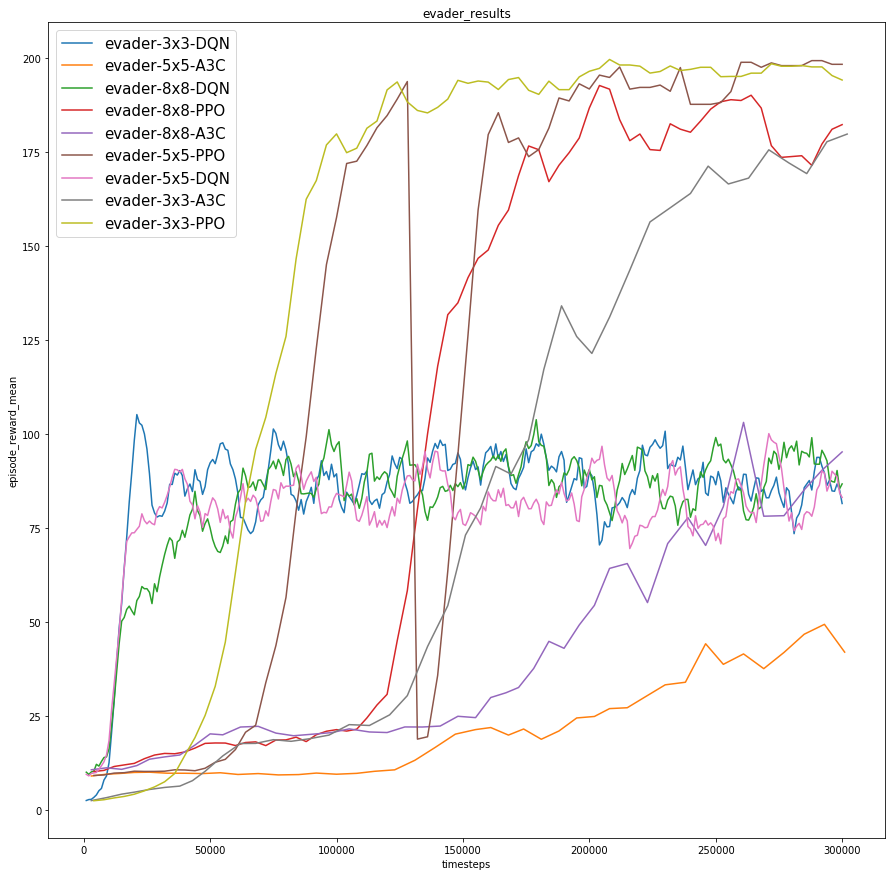

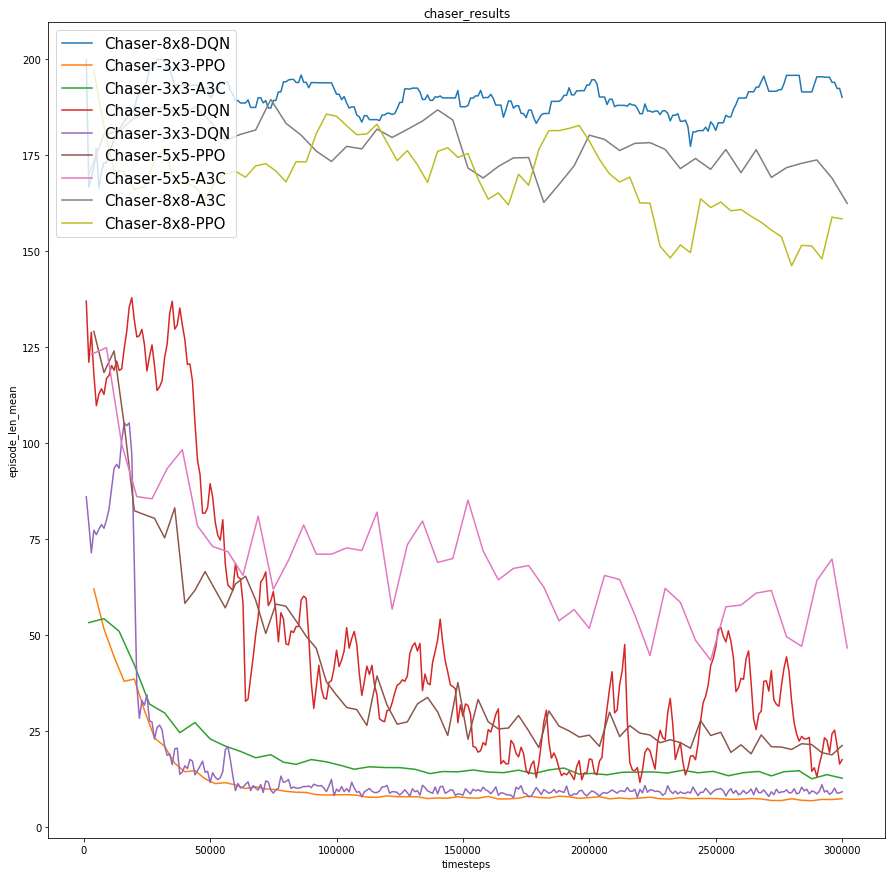

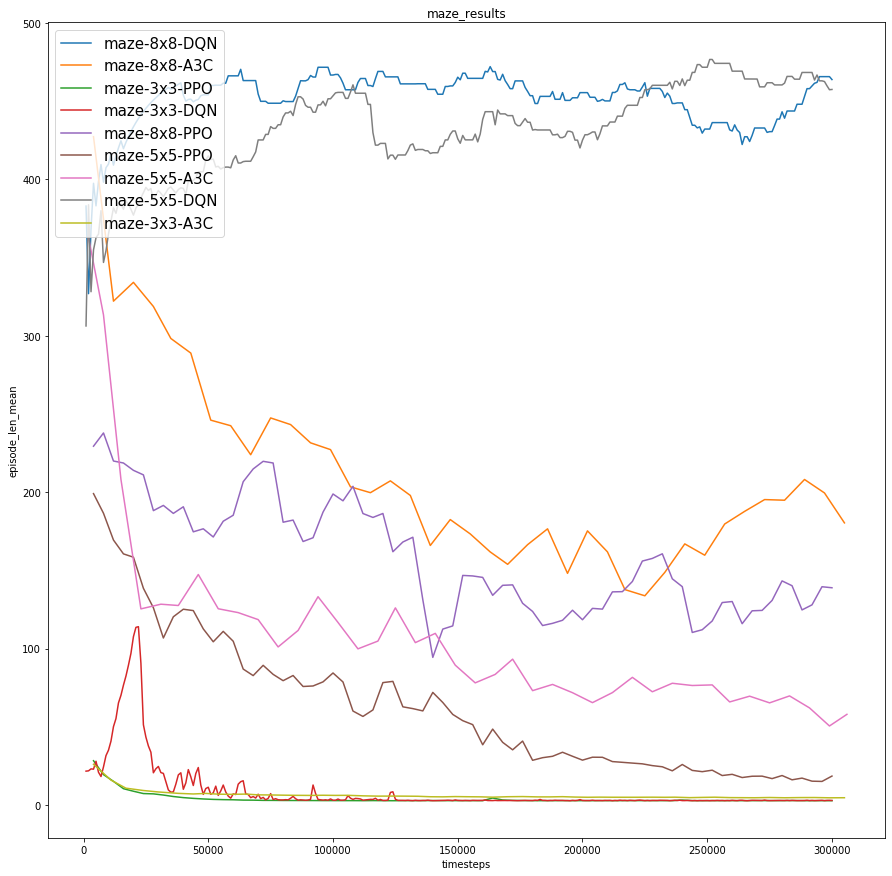

In [62]:
"""
Generate episode length graphs for Chaser
"""


def get_df(top_level_dir, column = "episode_len_mean"):
    """
    Shows all the results in a directory from 
    """
    #This should point to wherever the results file is
    files = []

    for path in Path(top_level_dir).rglob('result.json'):
        files.append(path.__str__())

    all_dfs = {}
    data_dict = {}
    steps_dict = {}
    
    for file in files:

        #Extract the filename
        filename = file.split("/")[1]
        
        #print(filename)
        data = [json.loads(line) for line in open(file, 'r')]

        data_dict[filename] = []
        steps_dict[filename+'_xval'] = []
        
        
        for i in data:
            data_dict[filename].append(i[column])
            steps_dict[filename+'_xval'].append(i['timesteps_total'])

    return data_dict, steps_dict

def generate_multi_graph(top_dir, column):

    data_dict, steps_dict = get_df(top_dir, column=column)

    fig = plt.figure(figsize = (15,15))
    ax1 = fig.add_subplot(111)

    for idx in data_dict:
        ax1.plot(steps_dict[idx+"_xval"], data_dict[idx], label = idx)
    
    plt.legend(loc='upper left', prop={'size':15});
    plt.xlabel("timesteps")
    plt.ylabel(column)
    plt.title(top_dir)

    plt.show()
    
generate_multi_graph("evader_results", column = "episode_reward_mean")
generate_multi_graph("chaser_results", column = "episode_len_mean")
generate_multi_graph("maze_results", column = "episode_len_mean")


# df=pd.DataFrame.from_dict(data_dict,orient='index').transpose()
# display(df)

# df.plot(figsize = (10,10))

